<a href="https://colab.research.google.com/github/kadiyalamani15/Determining-Influential-Macroeconomic-Indicators-for-the-Australian-Stock-Market/blob/main/data_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 488 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=99a0b394c22196a12ead3ab37113ffab7795fec26f42f8478a2d96288f654bc8
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [10]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
# Reading Data

df = pd.read_excel("79_indices_agg.xlsx")
df.head()

,DATE,AUSBOT,AUSBP,AUSBR,AUSCA,AUSCARS,AUSCBBS,AUSCCON,AUSCCPI,AUSCF,...,AUSSSR,AUSSSRC,AUSSSRE,AUSTOT,AUSTOUR,AUSTVS,AUSUNP,AUSUNR,AUSUNRY,AUSWAGE
0,2010-01-31,-1399,-1.8,473,-18223,12269.3,78419.25,1792.18,95.8660,18295,...,10.5,10.5,1.5,105.4,448700,86146,607.867,5.3,11.3,968.3
1,2010-02-28,-1418,2.7,827,-18223,12269.3,78180.50,1802.41,95.8660,18295,...,10.5,10.5,1.5,105.4,560100,86045,611.984,5.3,11.3,968.3
2,2010-03-31,-2105,11.3,904,-18223,12269.3,84303.40,1807.67,95.8660,18295,...,10.5,10.5,1.5,105.4,526300,85783,626.429,5.4,11.8,968.3
3,2010-04-30,495,-6.9,737,-8978,12269.3,81429.00,1815.12,96.2427,5386,...,10.5,10.5,1.5,120.0,428900,92950,636.386,5.5,11.9,981.3
4,2010-05-31,958,-6.4,914,-8978,12269.3,92267.75,1823.88,96.2427,5386,...,10.5,10.5,1.5,120.0,375000,88942,603.493,5.2,11.4,981.3


In [4]:
# Column Names

df.columns

Index(['DATE', 'AUSBOT', 'AUSBP', 'AUSBR', 'AUSCA', 'AUSCARS', 'AUSCBBS',
       'AUSCCON', 'AUSCCPI', 'AUSCF', 'AUSCI', 'AUSCINF', 'AUSCNCN',
       'AUSCONPMI', 'AUSCOP', 'AUSCP', 'AUSCPI', 'AUSCPIC', 'AUSCSP', 'AUSCU',
       'AUSCUR', 'AUSDINV', 'AUSDPINC', 'AUSEC', 'AUSEDBT', 'AUSEMP',
       'AUSEXPX', 'AUSEXVOL', 'AUSFDI', 'AUSFER', 'AUSFTEMP', 'AUSG',
       'AUSGAGR', 'AUSGBGT', 'AUSGBVL', 'AUSGCP', 'AUSGD', 'AUSGDG', 'AUSGFCF',
       'AUSGNP', 'AUSGOLD', 'AUSGPC', 'AUSGSP', 'AUSGYLD', 'AUSHOOD',
       'AUSIBOR', 'AUSIMPX', 'AUSIMVOL', 'AUSINFEX', 'AUSJOBADV', 'AUSJVAC',
       'AUSLC', 'AUSLEI', 'AUSLFPR', 'AUSLPS', 'AUSM1', 'AUSM3', 'AUSMANWG',
       'AUSMKT', 'AUSMP', 'AUSMPMI', 'AUSNHS', 'AUSOIL', 'AUSPPI', 'AUSPPIC',
       'AUSPROD', 'AUSPSAV', 'AUSPTEMP', 'AUSRSY', 'AUSSPMI', 'AUSSSR',
       'AUSSSRC', 'AUSSSRE', 'AUSTOT', 'AUSTOUR', 'AUSTVS', 'AUSUNP', 'AUSUNR',
       'AUSUNRY', 'AUSWAGE'],
      dtype='object')

In [5]:
# Dropping DATE column to perform required analysis

df.drop(['DATE'], axis=1, inplace=True)

In [6]:
# Checking Data Quality

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 79 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AUSBOT     108 non-null    int64  
 1   AUSBP      108 non-null    float64
 2   AUSBR      108 non-null    int64  
 3   AUSCA      108 non-null    int64  
 4   AUSCARS    108 non-null    float64
 5   AUSCBBS    108 non-null    float64
 6   AUSCCON    108 non-null    float64
 7   AUSCCPI    108 non-null    float64
 8   AUSCF      108 non-null    int64  
 9   AUSCI      108 non-null    float64
 10  AUSCINF    108 non-null    float64
 11  AUSCNCN    108 non-null    float64
 12  AUSCONPMI  108 non-null    float64
 13  AUSCOP     108 non-null    float64
 14  AUSCP      108 non-null    int64  
 15  AUSCPI     108 non-null    float64
 16  AUSCPIC    108 non-null    float64
 17  AUSCSP     108 non-null    int64  
 18  AUSCU      108 non-null    float64
 19  AUSCUR     108 non-null    float64
 20  AUSDINV   

79 variables, non-null

In [7]:
# Correlation

df_corr = df.corr(method='pearson')
df_corr

,AUSBOT,AUSBP,AUSBR,AUSCA,AUSCARS,AUSCBBS,AUSCCON,AUSCCPI,AUSCF,AUSCI,...,AUSSSR,AUSSSRC,AUSSSRE,AUSTOT,AUSTOUR,AUSTVS,AUSUNP,AUSUNR,AUSUNRY,AUSWAGE
AUSBOT,1.000000,-0.049577,-0.285529,0.851858,0.116214,0.057328,0.164736,0.082134,-0.707841,0.575253,...,0.097549,0.097549,0.025098,0.234859,0.212904,-0.162709,-0.265187,-0.441104,-0.312728,0.037718
AUSBP,-0.049577,1.000000,0.146819,-0.075708,-0.043676,-0.040529,-0.052526,-0.040752,0.104626,-0.071565,...,-0.070444,-0.070444,-0.074074,0.014940,-0.052592,0.041424,0.040695,0.086537,0.117865,-0.027973
AUSBR,-0.285529,0.146819,1.000000,-0.270888,-0.450486,-0.429340,-0.444138,-0.421120,0.284957,-0.433386,...,-0.464373,-0.464373,-0.382314,0.356332,-0.495279,-0.143428,-0.280130,-0.108595,-0.182588,-0.371526
AUSCA,0.851858,-0.075708,-0.270888,1.000000,0.036358,-0.041539,0.053395,0.011237,-0.825081,0.383428,...,-0.040959,-0.040959,-0.146830,0.340831,0.109635,-0.181777,-0.193341,-0.273534,-0.150231,0.007190
AUSCARS,0.116214,-0.043676,-0.450486,0.036358,1.000000,0.951512,0.988917,0.993122,-0.106201,0.511008,...,0.932038,0.932038,0.870471,-0.813380,0.704862,0.596513,0.741753,0.370449,0.396041,0.973560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AUSTVS,-0.162709,0.041424,-0.143428,-0.181777,0.596513,0.607516,0.578633,0.603369,0.148725,0.200826,...,0.537051,0.537051,0.516949,-0.567870,0.400303,1.000000,0.589034,0.407925,0.345080,0.622232
AUSUNP,-0.265187,0.040695,-0.280130,-0.193341,0.741753,0.788386,0.683064,0.764876,0.083583,-0.027993,...,0.661712,0.661712,0.615630,-0.744095,0.475458,0.589034,1.000000,0.893258,0.823477,0.776416
AUSUNR,-0.441104,0.086537,-0.108595,-0.273534,0.370449,0.464622,0.289028,0.401166,0.149195,-0.375094,...,0.305182,0.305182,0.275781,-0.489044,0.177588,0.407925,0.893258,1.000000,0.880011,0.430736
AUSUNRY,-0.312728,0.117865,-0.182588,-0.150231,0.396041,0.484571,0.330488,0.422622,0.028451,-0.255926,...,0.350746,0.350746,0.305363,-0.424704,0.203487,0.345080,0.823477,0.880011,1.000000,0.432354


In [8]:
# Bartlett Test

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(42487.86566074874, 0.0)

P value < 0.005 hence the data is not a identity matrix, there lies correlation in the data

In [9]:
# KMO Test

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7099227362426941

P value > 0.65 hence data is elgible for PCA testing

In [16]:
# Standardizing data to Perform PCA

scale = StandardScaler()
scaled_data = scale.fit_transform(df)
scaled_data

array([[-0.50795724, -0.2412716 , -2.01201976, ..., -0.63868802,
        -1.18331196, -1.97437985],
       [-0.51790065,  0.27573898,  0.26591383, ..., -0.63868802,
        -1.18331196, -1.97437985],
       [-0.87743355,  1.26380364,  0.76139656, ..., -0.37440332,
        -0.5641371 , -1.97437985],
       ...,
       [ 1.49747225, -0.21829336, -0.28104762, ..., -1.43154212,
        -1.18331196,  1.55206076],
       [ 1.62987665, -1.1948689 , -0.51913673, ..., -1.16725742,
        -0.93564201,  1.55206076],
       [ 2.31701885, -0.9076408 , -1.42644926, ..., -1.43154212,
        -1.30714693,  1.55206076]])

In [18]:
# Finding Eigen values through PCA

pca = PCA()
df_pca = pca.fit(scaled_data).transform(scaled_data)
eigen_values = pca.explained_variance_
eigen_values

array([3.85785746e+01, 1.12295989e+01, 6.22294099e+00, 3.40782518e+00,
       2.07524228e+00, 1.99837384e+00, 1.77244195e+00, 1.65007816e+00,
       1.41528872e+00, 1.31248308e+00, 1.14254366e+00, 1.09145558e+00,
       9.15149429e-01, 7.13177615e-01, 6.74060380e-01, 6.23371614e-01,
       5.79266531e-01, 4.75994150e-01, 4.50713586e-01, 4.37430785e-01,
       3.86279738e-01, 3.50163356e-01, 2.64133676e-01, 2.47485920e-01,
       2.15998362e-01, 1.94373093e-01, 1.65697666e-01, 1.36756503e-01,
       1.21111537e-01, 1.15132259e-01, 1.02942173e-01, 8.61333809e-02,
       7.82450434e-02, 6.62541689e-02, 5.68435300e-02, 5.36543532e-02,
       4.62366772e-02, 4.10312220e-02, 3.17612083e-02, 2.83677080e-02,
       2.42347012e-02, 2.29982816e-02, 2.13199621e-02, 1.66982421e-02,
       1.55041427e-02, 1.48641051e-02, 1.21414346e-02, 1.01884854e-02,
       9.18873348e-03, 7.99670475e-03, 6.45558706e-03, 5.59437350e-03,
       3.62893040e-03, 2.82485481e-03, 1.77556378e-03, 1.75395852e-03,
      

In [27]:
# Using the Kaiser Criterion, the no. of Components are selected

f = []
nf = []
count = 0
for i in eigen_values :
  if (i >= 1) :
    print(i)
    f.append(round(i,4))
    nf.append(round(i,4))
    count += 1
  else:
    f.append(None)
    nf.append(round(i,4))
print(f"No. of Factors: {count}" )

38.5785746089118
11.229598946087862
6.22294099199377
3.407825179193223
2.0752422829027397
1.9983738371361002
1.772441949603444
1.6500781570729557
1.415288718860207
1.3124830821702294
1.1425436578373276
1.0914555821873813
No. of Factors: 12


In [34]:
df_eigen = pd.DataFrame(columns=["Factors","NFactors"])
df_eigen['Factors'] = f
df_eigen['NFactors'] = nf
df_eigen.index += 1
df_eigen

,Factors,NFactors
1,38.5786,38.5786
2,11.2296,11.2296
3,6.2229,6.2229
4,3.4078,3.4078
5,2.0752,2.0752
...,...,...
75,NaN,0.0000
76,NaN,0.0000
77,NaN,0.0000
78,NaN,0.0000


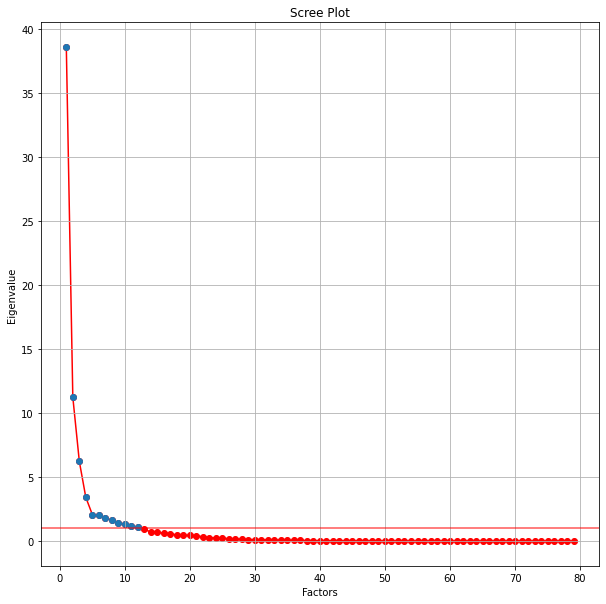

In [42]:
# Visualizing Eigen Values

def scree_plot():
  plt.figure(figsize=(10,10))
  df_eigen['NFactors'].plot(color='r', marker='o', zorder=0)
  plt.scatter(df_eigen.index, df_eigen['Factors'], zorder=1)
  plt.axhline(y=1, linewidth=2, color='r', alpha=0.5)
  plt.title('Scree Plot')
  plt.xlabel('Factors')
  plt.ylabel('Eigenvalue')
  plt.grid()
  plt.show()

scree_plot()

In [43]:
# Using Scaled data to perform PCA with VARIMAX and find component loadings

fa = FactorAnalyzer()
fa.set_params(n_factors=12, method='principal', rotation='varimax')
fa.fit(scaled_data)
factor_loadings12_pca_varimax = pd.DataFrame(fa.loadings_, index=df.columns, columns=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6','Factor7','Factor8','Factor9','Factor10','Factor11','Factor12'])
factor_loadings12_pca_varimax

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12
AUSBOT,0.084949,0.421929,-0.025453,0.813263,-0.128310,0.042590,0.076296,0.151913,0.065004,0.034203,0.106240,-0.056406
AUSBP,-0.034459,-0.071126,0.058431,-0.032769,-0.103603,0.169315,0.057606,-0.051058,0.104949,-0.779631,-0.193976,-0.058977
AUSBR,-0.407321,0.019334,0.236276,-0.403094,-0.093266,0.262221,0.235062,-0.061357,-0.210573,-0.196741,0.205520,-0.190564
AUSCA,-0.020190,0.161888,0.093431,0.947001,-0.081918,0.004641,0.034560,0.012234,0.038163,0.017358,0.051659,-0.019994
AUSCARS,0.988663,-0.029518,0.059208,0.067423,0.021859,-0.025248,-0.015269,0.034225,0.020325,0.001919,-0.026408,0.035276
...,...,...,...,...,...,...,...,...,...,...,...,...
AUSTVS,0.604495,-0.199651,0.156211,-0.185674,-0.089947,0.155564,0.011355,-0.039448,0.132392,0.096495,-0.256258,-0.087859
AUSUNP,0.736314,-0.619053,0.038096,-0.104835,-0.047174,-0.056357,-0.020090,0.030989,0.047346,0.008657,0.038556,-0.040765
AUSUNR,0.362482,-0.862104,0.000335,-0.158627,-0.056043,-0.063827,-0.029015,0.018196,0.039080,0.001278,0.051200,-0.058968
AUSUNRY,0.391085,-0.795021,-0.064947,-0.021411,0.046505,0.048889,0.036603,0.003279,0.052774,0.013575,0.019340,-0.019274
